In [12]:
import os
import pandas as pd

# === CONFIG ===
base_dir = "C:/Users/lpnhu/Downloads/Stress_Testing_Analysis/data/cleaned_biomarkers"
output_dir = os.path.join(base_dir, "..", "..", "eda_qc_reports")
os.makedirs(output_dir, exist_ok=True)

all_qc_results = []

# === LOOP THROUGH PARTICIPANTS ===
for participant in sorted(os.listdir(base_dir)):
    part_path = os.path.join(base_dir, participant)
    if not os.path.isdir(part_path):
        continue

    cleaned_dir = part_path  # FIXED: no nested 'cleaned' folder
    for file in sorted(os.listdir(cleaned_dir)):
        if not file.endswith(".csv"):
            continue

        fpath = os.path.join(cleaned_dir, file)
        try:
            df = pd.read_csv(fpath)
        except Exception as e:
            print(f"❌ Failed to read {fpath}: {e}")
            continue

        eda_cols = [col for col in df.columns if "eda" in col.lower()]
        eda_col = eda_cols[0] if eda_cols else None

        record = {
            "participant_id": participant.split("_")[-1],
            "file": file,
            "date": file.replace("cleaned_", "").replace(".csv", ""),
            "n_rows": len(df),
            "eda_column": eda_col,
            "eda_na_pct": None,
            "eda_std": None,
            "valid_EDA_day": 0
        }

        if eda_col:
            eda = df[eda_col]
            record["eda_na_pct"] = eda.isna().mean() * 100
            record["eda_std"] = eda.std(skipna=True)
            if record["eda_na_pct"] < 30 and record["eda_std"] > 0.01:
                record["valid_EDA_day"] = 1

        all_qc_results.append(record)

# === SAVE COMBINED REPORT ===
qc_df = pd.DataFrame(all_qc_results)
qc_path = os.path.join(output_dir, "eda_signal_quality_all_participants.csv")
qc_df.to_csv(qc_path, index=False)

print(f"✅ EDA signal quality saved to: {qc_path}")



✅ EDA signal quality saved to: C:/Users/lpnhu/Downloads/Stress_Testing_Analysis/data/cleaned_biomarkers\..\..\eda_qc_reports\eda_signal_quality_all_participants.csv


C:\Users\lpnhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


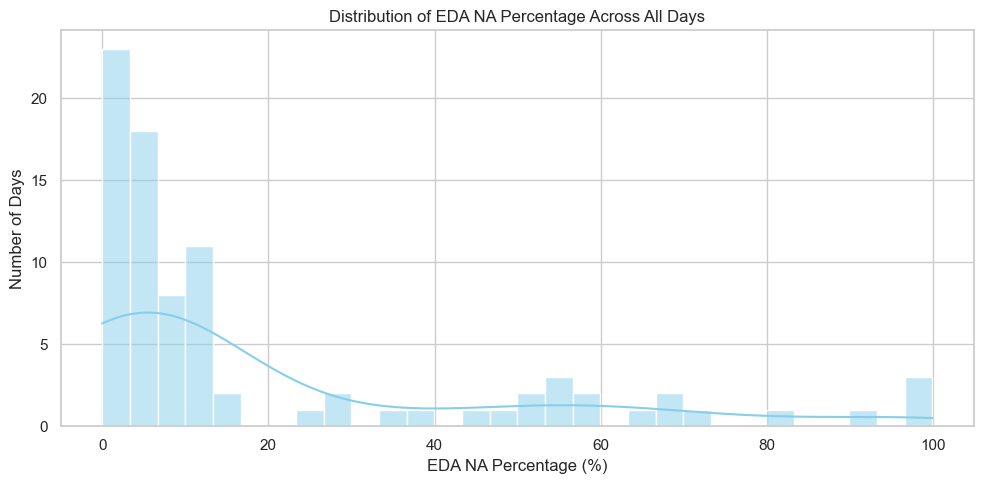

C:\Users\lpnhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


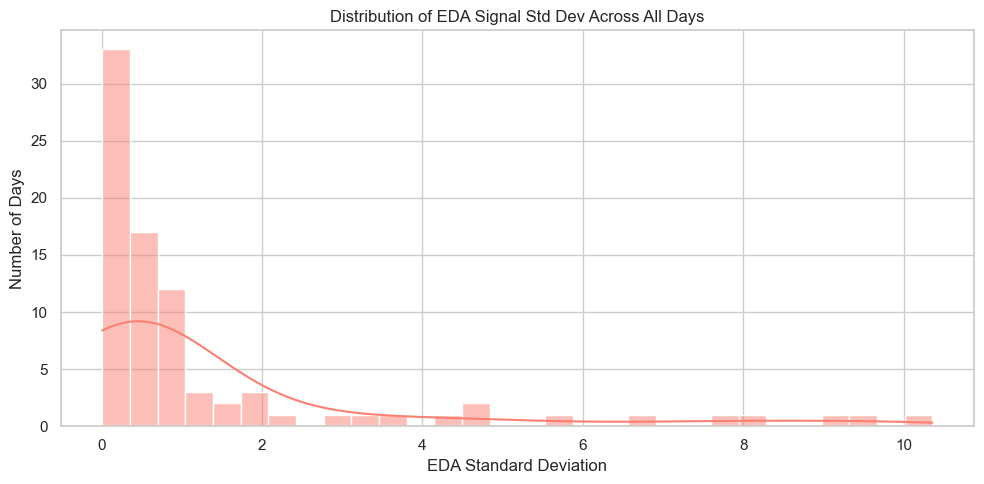

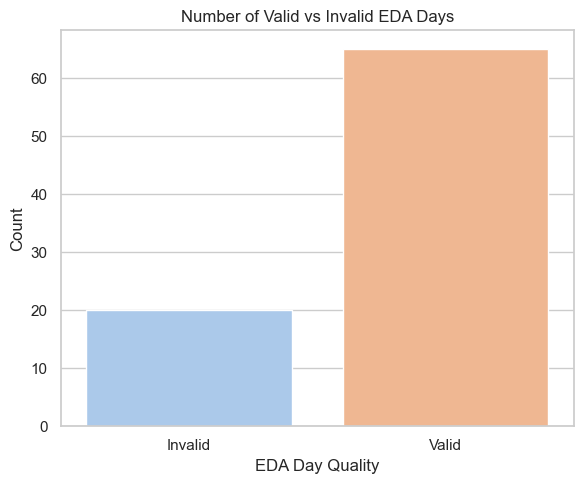

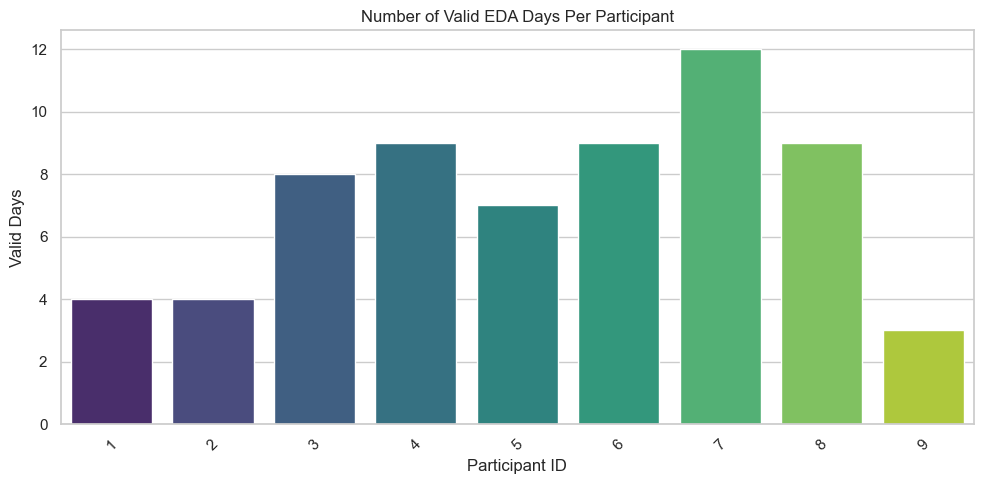

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load the QC summary file ===
qc_df = pd.read_csv("C:/Users/lpnhu/Downloads/Stress_Testing_Analysis/eda_qc_reports/eda_signal_quality_all_participants.csv")

# === Set plotting style ===
sns.set(style="whitegrid")

# === Plot 1: NA percentage distribution ===
plt.figure(figsize=(10, 5))
sns.histplot(qc_df["eda_na_pct"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of EDA NA Percentage Across All Days")
plt.xlabel("EDA NA Percentage (%)")
plt.ylabel("Number of Days")
plt.tight_layout()
plt.show()

# === Plot 2: Standard deviation of EDA ===
plt.figure(figsize=(10, 5))
sns.histplot(qc_df["eda_std"], bins=30, kde=True, color='salmon')
plt.title("Distribution of EDA Signal Std Dev Across All Days")
plt.xlabel("EDA Standard Deviation")
plt.ylabel("Number of Days")
plt.tight_layout()
plt.show()

# === Plot 3: Valid vs. Invalid EDA days ===
plt.figure(figsize=(6, 5))
sns.countplot(x="valid_EDA_day", data=qc_df, palette="pastel")
plt.title("Number of Valid vs Invalid EDA Days")
plt.xticks([0, 1], ["Invalid", "Valid"])
plt.ylabel("Count")
plt.xlabel("EDA Day Quality")
plt.tight_layout()
plt.show()

# === Valid EDA days per participant ===
valid_counts = qc_df.groupby("participant_id")["valid_EDA_day"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="participant_id", y="valid_EDA_day", data=valid_counts, palette="viridis")
plt.title("Number of Valid EDA Days Per Participant")
plt.ylabel("Valid Days")
plt.xlabel("Participant ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

